Hello David,

Great question! Luckily, I just finished my thesis and decided to do a little bit of research into the problem this afternoon. While you asked some about sneezes, the 6 ft. guidelines don't really apply to someone sneezing uncovered at you. Some research shows that sneeze droplets can travel as far as [8 meters (26.2 ft.)](https://www.sciencefocus.com/the-human-body/how-far-do-coughs-and-sneezes-travel/), far beyond the recommended distancing. However, these droplets can further disperse into gas clouds that can be carried even further in the presense of a breeze. Additionally, I believe that sneezing is not a sypmtom of the caronavirus (though coughing is) and, while I would suspect that it can be transmitted through the sneeze of someone with allergies, sneezes are not a primary motivation of the social-distancing rules.

The ["6-foot rule"](https://futurism.com/neoscope/mit-professor-guidelines-stay-six-feet-arent-enough) is based on the gas clouds expelled through normal breathing or coughing. However, we can still assume that wind would affect the "danger zone" around another person.

I would like to preface the analysis by saying that I am obviously not a physicist (or taken a physics class in like 4 years) or an expert in disease transmission and that you should listen to people that actually are in determining how close you get to people.

## Table of Contents:
<font size = "4">-[Ballistics Equations](#1)</font>

<font size = "4">-[Horizontal Distance vs. Time](#2)</font>

<font size = "4">-[Perpindicular Wind Speed](#3)</font>

<font size = "4">-[Horizontal Dispersion](#4)</font>

<font size = "4">-[Sneeze in Wind](#5)</font>

## Ballistics Equations <a class = "anchor" id = 1></a>

That being said, I will try to model this problem as if there are virus-carrying water droplets emitted from a person. It might be more accurate to model it as a dispersed gas cloud, but I believe solving that problem would be much more difficult and likely require experiments for which I have neither the equipment nor time.

Fortunately, there are fairly standard equations to model how water droplets could travel through the air. These actually use ballistics equations and it is in fact rocket science. Not coincidentally, NASA has a great [page](https://www.grc.nasa.gov/www/k-12/airplane/flteqs.html) explaining some of these equations, their variables, and their derivations. The following picture comes from that site:

<img src = "Capture.png"/>

Of course, we're not launching our virus-carrying water into orbit. Instead, we're expelling them horizontally. To begin this analysis, we're going to need some parameters. While you asked your questions in English units, I will be using the impirial system for simplicity. It's fairly common knowledge that:

$ g = 9.82 m/s^2$ (Earth's acceleration due to gravity)

However, I had to do some digging for other constants. A [paper presented in 1991](https://pdfs.semanticscholar.org/de4f/3a26551f3dc428d42027d5d45f2935d3961e.pdf) presents some very in-depth analysis on the drag constant for water droplets. I'll be ignoring most of their research, but they also present some standard caculations and experimental values that I will be using. Apparently, there is a model devleoped by Wang and Pruppacher that predicts the drag constant of water droplets to be:

<font size="5">$C_n = \frac{g}{V_{T}^n}$</font>

where n is typpically equal to 2 and $V_{T}$ is the terminal velocity of the water droplet. The research presents some experimental terminal velocity values. I will be using the smallest drop diameter they tested, which is 15 mm. (0.06 in). Their terminal velocity for this value is 5.44 m/s (17.8 ft/s). I want the smallest  diameter not only because this is likely the most accurate, but it also gives us the worst-case scenario of droplet hang-time. Using this value:

In [1]:
g = 9.82
Cn = g/(5.44**2)
print("Cn = ", Cn)

Cn =  0.33182850346020754


(The drag constant is unitless)

Because we're using a water droplet with a diameter of 15 mm. for our drag consant, this determines our next parameter: Area. This area refers to the area that is perpindicular to the force (there's a technical term for it that I simply cannot remember right now). Because our projectile is roughly a sphere, this will be modeled as a circle.

$A = \pi*(d/2)^2$

In [2]:
from math import pi
A = pi*((15*1e-3)/2)**2
print("A = ", A, "m^2")

A =  0.00017671458676442585 m^2


Now we need our density. I'll be using the density of water as that is much easier to find than the density of saliva/mucus.

$\rho = 997 kg/m^3$

Finally, we need mass. This is actually a derivation of values we already have.

$m = \rho*Volume = \rho*(4/3)*\pi*r^3$

In [3]:
rho = 997
m = rho*4/3*pi*((15*1e-3)/2)**3
print("Mass = ", m)

Mass =  0.0017618444300413255


To begin our analysis, we need to know how long the droplets are in the air. Unfortunately, the only thing we know about their travel is that they are supposedly low/dispersed enough by 6 ft. away that they don't matter. This gives us a distance, but we also need a starting velocity to calculate total travel time. A paper title [Potential Sourecs of Infectious Aerosols](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0059970) very kindly listed the maximum velocity of airflow from the mouth in their abstract as 1.3 m/s.

Because we know the horizontal travel distance, we will be using the Horizontal equation from the orginal NASA graphic (keep in mind that $U$ is the horizontal velocity and $V_{t}$ is the terminal velocity):

<font size="5">$x = \frac{V_{t}^2}{g}*ln(\frac{V_{t}^2+g*U_{0}*t)}{V_{t}^2})$</font>

Rearranging this for t is a little messy, but should come out to:

<font size="5">$t = \frac{e^{(\frac{x*g}{V_{t}^2})}*V_{t}^2-V_{t}^2}{g*U_{0}}$</font>

Because we're looking for the time when the water droplets are 6 ft. (1.8288 m), that should be our $x$ value. Our $U_{0}$ should be 1.3 m/s.

In [4]:
from math import exp
from math import log #default log base in Python is e, not 10

Vt = 5.44
x = 1.8288
U0 = 1.3

t = (exp((x*g)/(Vt**2))*Vt**2-Vt**2)/(g*U0)
print("Total travel time = ", t, "sec.")

Total travel time =  1.9348257466216072 sec.


Interesting! This also implies that you should trail people by an additional 2 sec. when walking behind them to avoid their lingering gas cloud!

Now that we have some basic information, it's time to actually answer your question!

As a baseline, the following graph shows our modeled water droplet travels horizontally to a position 6 ft. away using the horizontal motion equation above.

## Horizontal Distance vs. Time <a class = "anchor" id = 2></a>

In [5]:
import matplotlib.pyplot as plt
import numpy as np

Vt = 5.44
x = 1.8288
U0 = 1.3
tmax = (exp((x*g)/(Vt**2))*Vt**2-Vt**2)/(g*U0)

xpositions = []
times = []
for t in list(np.arange(0, tmax, tmax/1000)):
    times.append(t)
    xpositions.append(((Vt**2)/g)*log((Vt**2+g*U0*t)/(Vt**2)))
    
xpositions = np.array(xpositions)
times = np.array(times)

plt.plot(times,xpositions)
plt.xlabel("Time (sec.)")
plt.ylabel("Horizontal Distance Traveled (m)")

Text(0, 0.5, 'Horizontal Distance Traveled (m)')

In [6]:
t = 1.9328909208749856
U0 = 1.3

((Vt**2)/g)*log((Vt**2+g*U0*t)/(Vt**2))

1.8274286974201286

Well, that's not too flashy but it shows how the water droplet travels to a point 6 ft. away.

Now, what if there was a wind? This actually introduces a third axis: the axis perpindicular to the infected person and yourself. There is a wind traveling along this axis, which is quite simply modeled by a starting velocity in our horizontal ballistic movement equation. The questions asks about 3 wind speeds: 5 mph, 10 mph, 15 mph. Converting these to m/s gives us: 2.235, 4.4704, 6.7056. The water droplet is considered to be "expired" after it has traveled a total of 6 linear feet from its origin.

We'll plot these perpindicular movements vs. the horizontal movements to help us visualize these.

## Perpindicular Wind Speed <a class = "anchor" id = 3></a>

Text(0, 0.5, 'Perpindicular Position (m)')

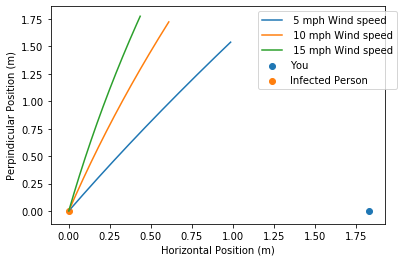

In [7]:
from math import sqrt

x = 1.8288
U0x = 1.3
tmax = (exp((x*g)/(Vt**2))*Vt**2-Vt**2)/(g*U0x)
velocities = [2.235,4.4704,6.7056]
mphs = {2.235:' 5 mph Wind speed',4.4704:' 10 mph Wind speed',6.7056:' 15 mph Wind speed'}


xpositions = {}
ypositions = {}
for U0y in velocities:
    xpositions[U0y] = []
    ypositions[U0y] = []
    for t in list(np.arange(0, tmax, tmax/10000)):
        x = ((Vt**2)/g)*log((Vt**2+g*U0x*t)/(Vt**2))
        y = ((Vt**2)/g)*log((Vt**2+g*U0y*t)/(Vt**2))
        if sqrt(x**2+y**2) <=  1.8288:
            xpositions[U0y].append(x)
            ypositions[U0y].append(y)
    ypositions[U0y] = np.array(ypositions[U0y])
    xpositions[U0y] = np.array(xpositions[U0y])
times = np.array(times)


for U0y in velocities:
    plt.plot(xpositions[U0y],ypositions[U0y], label = mphs[U0y])
plt.scatter([1.8288],[0], label = "You")
plt.scatter([0],[0], label = "Infected Person")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Perpindicular Position (m)")

This shows that the "danger zone" shifts pretty signifcantly downwind in the presence of any wind. However, this only shows the trajectory of a single water droplet shot in a straight line to you. We can assume that a person is sort of radiating these water droplets from themselves with the given velocity of 1.3 m/s. So let's vary these velocities between +1.3 and -1.3 to get an idea of the area of the dispersion.

Let's start with no wind:

## Horizontal Dispersion <a class = "anchor" id = 4></a>

Text(0, 0.5, 'Horizontal Distance Traveled (m)')

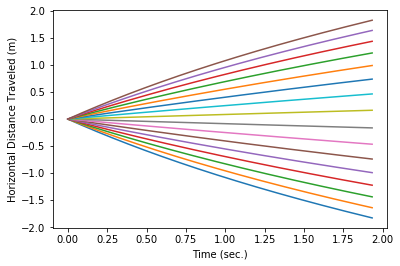

In [8]:
Vt = 5.44
x = 1.8288
U0 = 1.3
tmax = (exp((x*g)/(Vt**2))*Vt**2-Vt**2)/(g*U0)

xpositions = {}
for U0 in list(np.arange(-1.3, 1.3+(1.3*2)/15, (1.3*2)/15)):
    times = []
    xpositions[U0] = []
    for t in list(np.arange(0, tmax, tmax/1000)):
        times.append(t)
        if U0>=0:
            xpositions[U0].append(((Vt**2)/g)*log((Vt**2+g*U0*t)/(Vt**2)))
        if U0 < 0:
            xpositions[U0].append(-((Vt**2)/g)*log((Vt**2+g*-U0*t)/(Vt**2)))
    xpositions[U0] = np.array(xpositions[U0])
times = np.array(times)

for U0 in list(np.arange(-1.3, 1.3+(1.3*2)/15, (1.3*2)/15)):
    plt.plot(times,xpositions[U0])
plt.xlabel("Time (sec.)")
plt.ylabel("Horizontal Distance Traveled (m)")

This gives a good representation of the horizontal spread of this gas. Keep in mind that this graph is vs. time and not a distance.

Now let's add back in the wind!

Text(0.5, 1.0, '5 mph wind speed')

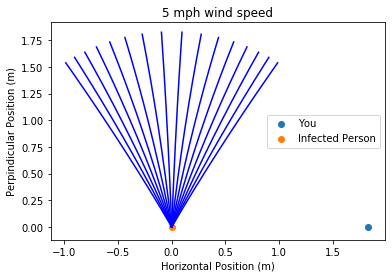

In [9]:
Vt = 5.44
x = 1.8288
U0 = 1.3
tmax = (exp((x*g)/(Vt**2))*Vt**2-Vt**2)/(g*U0)

wind = 2.235 #[2.235,4.4704,6.7056]
xpositions = {}
for U0x in list(np.arange(-1.3, 1.3+(1.3*2)/15, (1.3*2)/15)):
    times = []
    xpositions[U0x] = []
    ypositions[U0x] = []
    for t in list(np.arange(0, tmax, tmax/1000)):
        times.append(t)
        if U0x >= 0:
            x = ((Vt**2)/g)*log((Vt**2+g*U0x*t)/(Vt**2))
        if U0x < 0:
            x = -((Vt**2)/g)*log((Vt**2+g*-U0x*t)/(Vt**2))
        y = ((Vt**2)/g)*log((Vt**2+g*wind*t)/(Vt**2))
        if sqrt(x**2+y**2) <=  1.8288:
            xpositions[U0x].append(x)
            ypositions[U0x].append(y)
    xpositions[U0x] = np.array(xpositions[U0x])
    ypositions[U0x] = np.array(ypositions[U0x])
times = np.array(times)

for U0x in list(np.arange(-1.3, 1.3+(1.3*2)/15, (1.3*2)/15)):
    plt.plot(xpositions[U0x],ypositions[U0x], color = 'b')
plt.scatter([1.8288],[0], label = "You")
plt.scatter([0],[0], label = "Infected Person")
plt.legend()
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Perpindicular Position (m)")
plt.title("5 mph wind speed")

Text(0.5, 1.0, '10 mph wind speed')

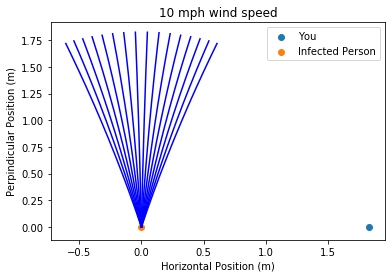

In [10]:
Vt = 5.44
x = 1.8288
U0 = 1.3
tmax = (exp((x*g)/(Vt**2))*Vt**2-Vt**2)/(g*U0)

wind = 4.4704 #[2.235,4.4704,6.7056]
xpositions = {}
for U0x in list(np.arange(-1.3, 1.3+(1.3*2)/15, (1.3*2)/15)):
    times = []
    xpositions[U0x] = []
    ypositions[U0x] = []
    for t in list(np.arange(0, tmax, tmax/1000)):
        times.append(t)
        if U0x >= 0:
            x = ((Vt**2)/g)*log((Vt**2+g*U0x*t)/(Vt**2))
        if U0x < 0:
            x = -((Vt**2)/g)*log((Vt**2+g*-U0x*t)/(Vt**2))
        y = ((Vt**2)/g)*log((Vt**2+g*wind*t)/(Vt**2))
        if sqrt(x**2+y**2) <=  1.8288:
            xpositions[U0x].append(x)
            ypositions[U0x].append(y)
    xpositions[U0x] = np.array(xpositions[U0x])
    ypositions[U0x] = np.array(ypositions[U0x])
times = np.array(times)

for U0x in list(np.arange(-1.3, 1.3+(1.3*2)/15, (1.3*2)/15)):
    plt.plot(xpositions[U0x],ypositions[U0x], color = 'b')
plt.scatter([1.8288],[0], label = "You")
plt.scatter([0],[0], label = "Infected Person")
plt.legend()
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Perpindicular Position (m)")
plt.title("10 mph wind speed")

These graphs show that in the presence of any wind, the "danger zone" around a person changes dramatically. These models indicate that you can stand very close to someone in the presence of wind if it's perpindicular to you. However, they also indicate that you should also be very careful of being up/downwind of someone.

For fun, let's look at how a sneeze might propogate compared to these values. It looks like a sneeze travels about [100 miles per hour](https://www.webmd.com/allergies/features/11-surprising-sneezing-facts#1), so we'll use that for our U0x value.

## Sneeze in Wind <a class = "anchor" id = 5></a>

Text(0.5, 1.0, 'Sneeze in no wind')

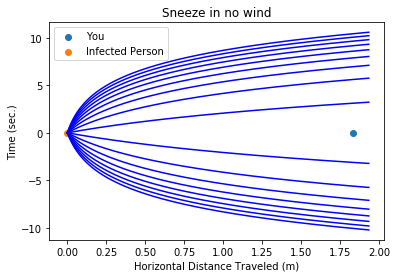

In [11]:
Vt = 5.44
x = 1.8288
U0 = 1.3
tmax = (exp((x*g)/(Vt**2))*Vt**2-Vt**2)/(g*U0)

wind = 0 #[2.235,4.4704,6.7056]
xpositions = {}
for U0x in list(np.arange(-44.7, 44.7+(44.7*2)/15, (44.7*2)/15)):
    times = []
    xpositions[U0x] = []
    ypositions[U0x] = []
    for t in list(np.arange(0, tmax, tmax/1000)):
        times.append(t)
        if U0x >= 0:
            x = ((Vt**2)/g)*log((Vt**2+g*U0x*t)/(Vt**2))
        if U0x < 0:
            x = -((Vt**2)/g)*log((Vt**2+g*-U0x*t)/(Vt**2))
        y = ((Vt**2)/g)*log((Vt**2+g*wind*t)/(Vt**2))
        xpositions[U0x].append(x)
        ypositions[U0x].append(y)
    xpositions[U0x] = np.array(xpositions[U0x])
    ypositions[U0x] = np.array(ypositions[U0x])
times = np.array(times)

for U0x in list(np.arange(-44.7, 44.7+(44.7*2)/15, (44.7*2)/15)):
    plt.plot(times,xpositions[U0x], color = 'b')
plt.scatter([1.8288],[0], label = "You")
plt.scatter([0],[0], label = "Infected Person")
plt.legend()
plt.xlabel("Horizontal Distance Traveled (m)")
plt.ylabel("Time (sec.)")
plt.title("Sneeze in no wind")

Text(0.5, 1.0, 'Sneeze in 10 mph wind speed')

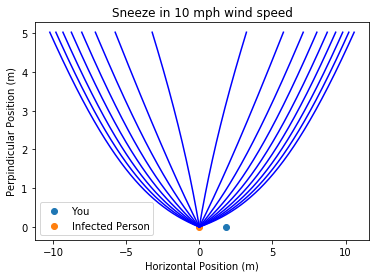

In [12]:
Vt = 5.44
x = 1.8288
U0 = 1.3
tmax = (exp((x*g)/(Vt**2))*Vt**2-Vt**2)/(g*U0)

wind = 6.7056 #[2.235,4.4704,6.7056]
xpositions = {}
for U0x in list(np.arange(-44.7, 44.7+(44.7*2)/15, (44.7*2)/15)):
    times = []
    xpositions[U0x] = []
    ypositions[U0x] = []
    for t in list(np.arange(0, tmax, tmax/1000)):
        times.append(t)
        if U0x >= 0:
            x = ((Vt**2)/g)*log((Vt**2+g*U0x*t)/(Vt**2))
        if U0x < 0:
            x = -((Vt**2)/g)*log((Vt**2+g*-U0x*t)/(Vt**2))
        y = ((Vt**2)/g)*log((Vt**2+g*wind*t)/(Vt**2))
        xpositions[U0x].append(x)
        ypositions[U0x].append(y)
    xpositions[U0x] = np.array(xpositions[U0x])
    ypositions[U0x] = np.array(ypositions[U0x])
times = np.array(times)

for U0x in list(np.arange(-44.7, 44.7+(44.7*2)/15, (44.7*2)/15)):
    plt.plot(xpositions[U0x],ypositions[U0x], color = 'b')
plt.scatter([1.8288],[0], label = "You")
plt.scatter([0],[0], label = "Infected Person")
plt.legend()
plt.xlabel("Horizontal Position (m)")
plt.ylabel("Perpindicular Position (m)")
plt.title("Sneeze in 10 mph wind speed")

This analysis is accurate to the best of my knowledge with the information that I had readily available. If you have any questions or notice any errors, please let me know!